In [1]:
# Step 1: import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# (nice style – optional)
sns.set_style("whitegrid")


In [2]:
# Step 2: load SpaceX dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df = pd.read_csv(url)
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


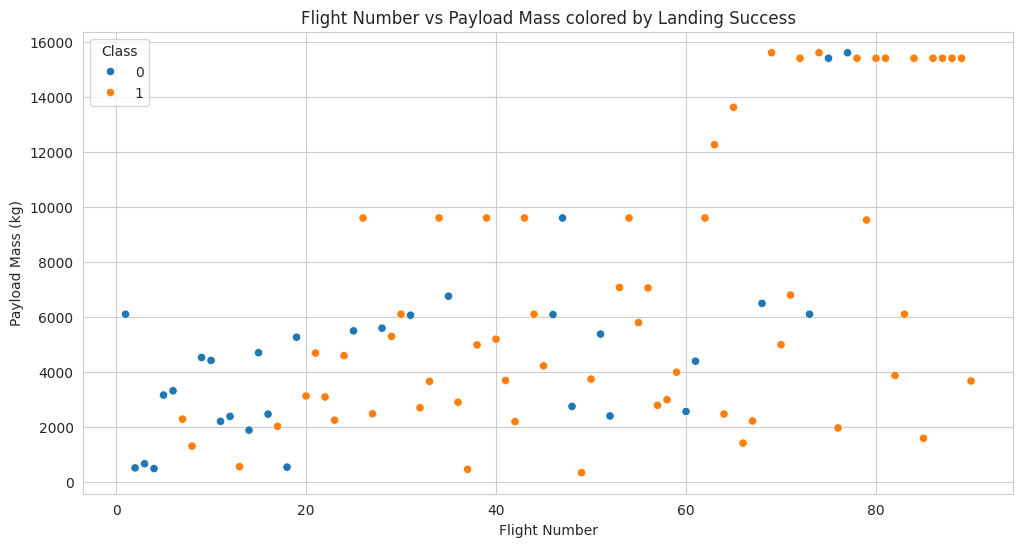

In [3]:
# Step 3: example scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='FlightNumber',
    y='PayloadMass',
    hue='Class'
)
plt.xlabel("Flight Number")
plt.ylabel("Payload Mass (kg)")
plt.title("Flight Number vs Payload Mass colored by Landing Success")
plt.show()


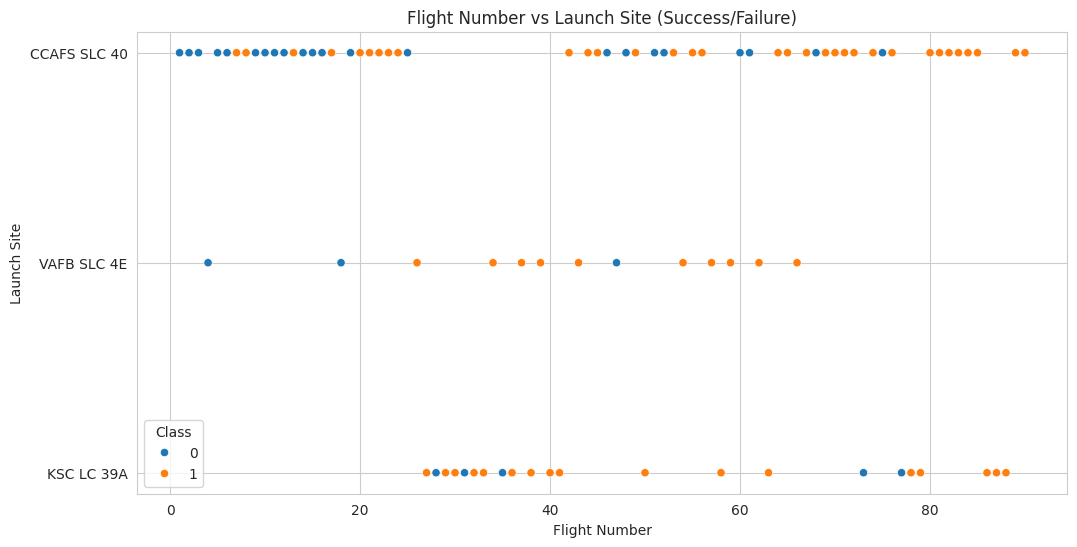

In [4]:
# TASK 1
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='FlightNumber',
    y='LaunchSite',
    hue='Class'
)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.title("Flight Number vs Launch Site (Success/Failure)")
plt.show()


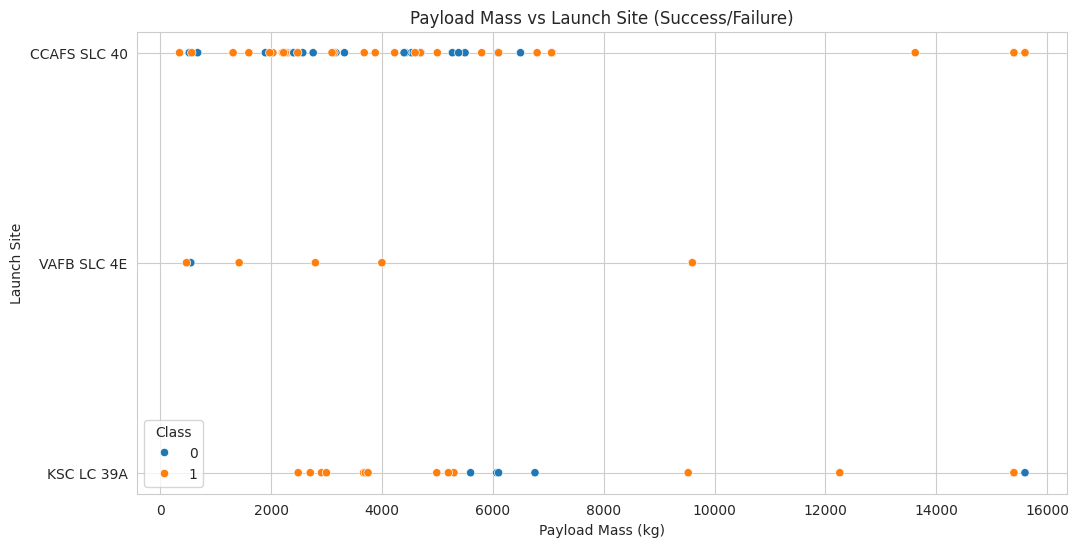

In [5]:
# TASK 2
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='PayloadMass',
    y='LaunchSite',
    hue='Class'
)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.title("Payload Mass vs Launch Site (Success/Failure)")
plt.show()


In [6]:
# TASK 3 – group by Orbit and compute mean(Class) = success rate
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

orbit_success


,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


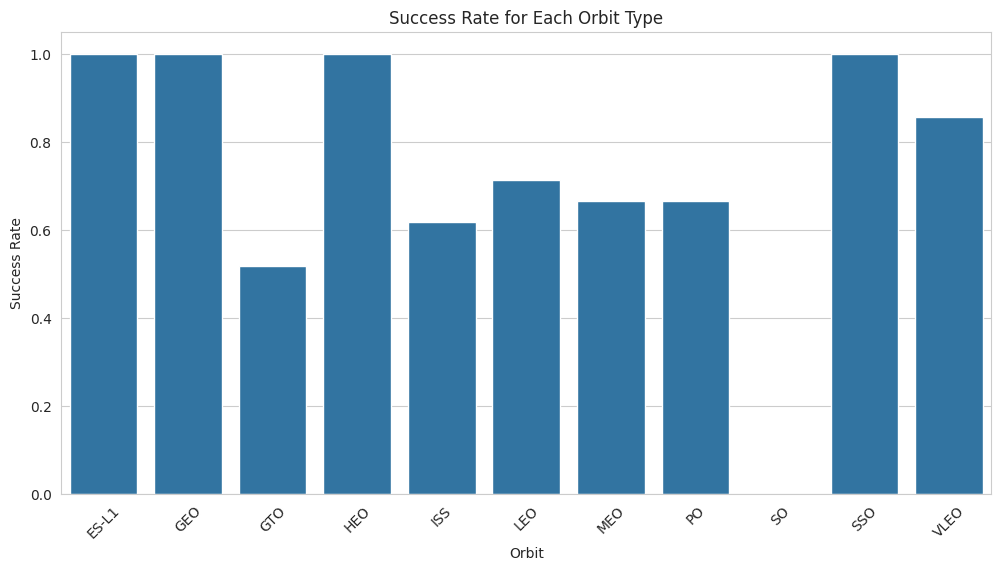

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=orbit_success,
    x='Orbit',
    y='Class'
)
plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.title("Success Rate for Each Orbit Type")
plt.xticks(rotation=45)
plt.show()


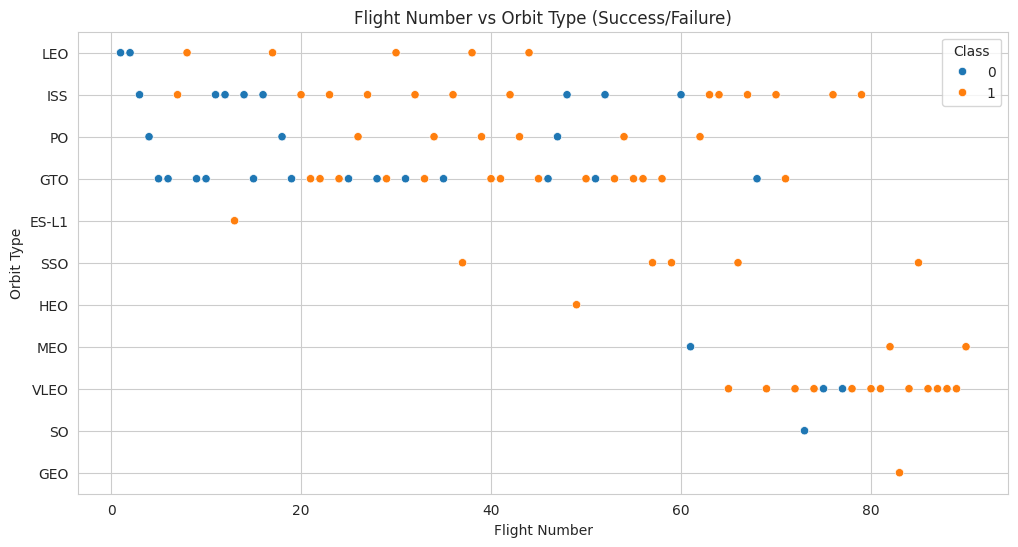

In [8]:
# TASK 4
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='FlightNumber',
    y='Orbit',
    hue='Class'
)
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.title("Flight Number vs Orbit Type (Success/Failure)")
plt.show()


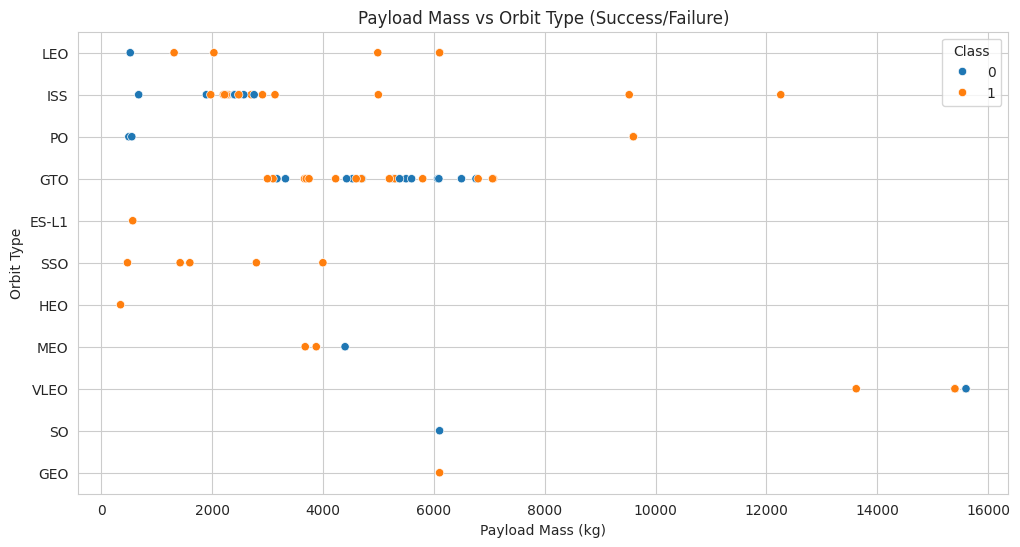

In [9]:
# TASK 5
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='PayloadMass',
    y='Orbit',
    hue='Class'
)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.title("Payload Mass vs Orbit Type (Success/Failure)")
plt.show()


In [10]:
# TASK 6 – extract year from Date
df['Year'] = pd.to_datetime(df['Date']).dt.year

df[['Date', 'Year']].head()


,Date,Year
0,2010-06-04,2010
1,2012-05-22,2012
2,2013-03-01,2013
3,2013-09-29,2013
4,2013-12-03,2013


In [11]:
# Compute yearly success rate
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

yearly_success


,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


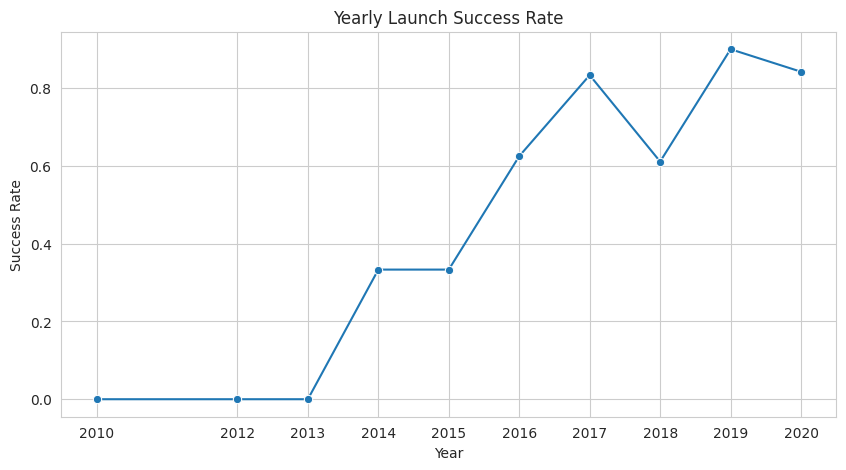

In [12]:
# Line chart of success rate by year
plt.figure(figsize=(10,5))
sns.lineplot(
    data=yearly_success,
    x='Year',
    y='Class',
    marker='o'
)
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.title("Yearly Launch Success Rate")
plt.xticks(yearly_success['Year'])   # show all years
plt.show()


In [13]:
# Select the features as in the lab
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite',
               'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad',
               'Block', 'ReusedCount', 'Serial']]

features.head()


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [14]:


# TASK 7 – get_dummies for categorical columns
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],
    dtype=int  # ensures numeric dtypes immediately
)

features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# TASK 8 – cast everything to float64
features_one_hot = features_one_hot.astype('float64')

features_one_hot.dtypes.head()


,0
FlightNumber,float64
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64


In [16]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)
